# Analysis_AlgoProfileRelevance_SMOTE
## Block 1: Importing libraries

In [1]:
# Packages / libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Block 2: Data loading

In [2]:
# Load the data (file location to change according to the user)
raw_data = pd.read_csv('C:\\Users\\filip\\Documents\\HSG\\Master\\Master Thesis\\Research\\Data for Python\\Data Analysis AlgoProfileRelevance.csv')

# Run the first 10 rows
raw_data.head(10)

,index,algorithmization,algo_profile
0,67,9,10
1,15,8,9
2,59,8,7
3,9,7,6
4,27,7,10
5,39,7,8
6,13,6,10
7,54,6,7
8,58,6,3
9,83,6,9


## Bock 3: Data cleaning

In [3]:
# Create a copy
data = raw_data.copy(deep=True)

# Drop the index column
data = data.drop(['index'], axis = 1)

# Normalize the explanatory variable
data['algorithmization'] = data['algorithmization'] / 10

# Find a threshold using Leave-One-Out Cross-Validation
loo = LeaveOneOut()
thresholds = []
for train_index, test_index in loo.split(data):
    train_set = data.iloc[train_index]
    test_set = data.iloc[test_index]
    model = LogisticRegression().fit(train_set[['algorithmization']], train_set['algo_profile'])
    predicted = model.predict(test_set[['algorithmization']])
    thresholds.append(predicted[0])

# Convert the explained variable into a binary variable
threshold = np.median(thresholds)
print("\nTreshold for algorithmic profile:", threshold)
data['algo_profile'] = (data['algo_profile'] > threshold).astype(int)

# Run the first 10 rows
data.head(10)


Treshold for algorithmic profile: 3.0


,algorithmization,algo_profile
0,0.9,1
1,0.8,1
2,0.8,1
3,0.7,1
4,0.7,1
5,0.7,1
6,0.6,1
7,0.6,1
8,0.6,0
9,0.6,1


## Block 4: Model training

In [4]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data[['algorithmization']], data['algo_profile'], test_size=0.2, random_state=42)

In [5]:
# SMOTE Algorithm
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before', counter)

# Generate synthetic samples using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 26, 0: 15})
After Counter({0: 26, 1: 26})


In [6]:
# Train the logistic regression model on the synthetic data
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

LogisticRegression()

## Block 5: Model evaluation

In [7]:
# Predict class labels for samples in X
y_pred_sm = model.predict(X_train_sm)

# Training accuracy on synthetic data
print("\nTraining accuracy on synthetic data: ", model.score(X_train_sm, y_train_sm))

# Confusion matrix on synthetic data
print("\nConfusion matrix on synthetic data:")
print(confusion_matrix(y_train_sm, y_pred_sm))

# Classification report on synthetic data
print("\nClassification report on synthetic data:")
print(classification_report(y_train_sm, y_pred_sm))


Training accuracy on synthetic data:  0.8269230769230769

Confusion matrix on synthetic data:
[[21  5]
 [ 4 22]]

Classification report on synthetic data:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.81      0.85      0.83        26

    accuracy                           0.83        52
   macro avg       0.83      0.83      0.83        52
weighted avg       0.83      0.83      0.83        52



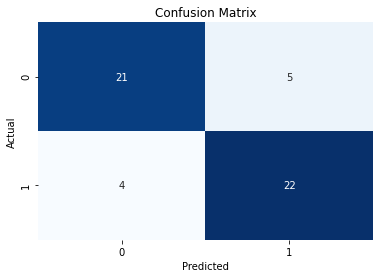

In [8]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_train_sm, y_pred_sm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Concatenate X_train and y_train horizontally
result_table = pd.concat([X_train, y_train], axis=1)

# Display the result table (original training set)
print(result_table)

    algorithmization  algo_profile
8                0.6             0
26               0.4             1
6                0.6             1
34               0.3             1
4                0.7             1
37               0.2             1
24               0.5             0
44               0.0             0
33               0.3             0
49               0.0             0
15               0.5             1
9                0.6             1
16               0.5             1
30               0.4             1
36               0.2             0
25               0.5             1
11               0.6             1
0                0.9             1
46               0.0             0
27               0.4             1
31               0.4             1
39               0.1             0
29               0.4             1
45               0.0             0
1                0.8             1
21               0.5             1
2                0.8             1
40               0.1

In [10]:
# Concatenate X_train_sm and y_train_sm horizontally
result_table_sm = pd.concat([X_train_sm, y_train_sm], axis=1)

# Display the result table (synthetic data included)
print(result_table_sm)

    algorithmization  algo_profile
0           0.600000             0
1           0.400000             1
2           0.600000             1
3           0.300000             1
4           0.700000             1
5           0.200000             1
6           0.500000             0
7           0.000000             0
8           0.300000             0
9           0.000000             0
10          0.500000             1
11          0.600000             1
12          0.500000             1
13          0.400000             1
14          0.200000             0
15          0.500000             1
16          0.600000             1
17          0.900000             1
18          0.000000             0
19          0.400000             1
20          0.400000             1
21          0.100000             0
22          0.400000             1
23          0.000000             0
24          0.800000             1
25          0.500000             1
26          0.800000             1
27          0.100000

In [11]:
# Assuming result_table_sm is the DataFrame obtained from concatenation
result_table_sm_cleaned = result_table_sm.drop(index=range(41, 52))

# Display the modified result table (synthetic data removed)
print(result_table_sm_cleaned)

    algorithmization  algo_profile
0                0.6             0
1                0.4             1
2                0.6             1
3                0.3             1
4                0.7             1
5                0.2             1
6                0.5             0
7                0.0             0
8                0.3             0
9                0.0             0
10               0.5             1
11               0.6             1
12               0.5             1
13               0.4             1
14               0.2             0
15               0.5             1
16               0.6             1
17               0.9             1
18               0.0             0
19               0.4             1
20               0.4             1
21               0.1             0
22               0.4             1
23               0.0             0
24               0.8             1
25               0.5             1
26               0.8             1
27               0.1

In [12]:
# Assuming result_table is the modified DataFrame
new_explanatory_variable = result_table_sm_cleaned.iloc[:, :-1]  # Exclude the last column
new_explained_variable = result_table_sm_cleaned.iloc[:, -1]    # Last column

# Display the new explanatory variable, without the synthetic data 
print("New Explanatory Variable:")
print(new_explanatory_variable)

# Display the new explained variable, without the synthetic data
print("\nNew Explained Variable:")
print(new_explained_variable)

New Explanatory Variable:
    algorithmization
0                0.6
1                0.4
2                0.6
3                0.3
4                0.7
5                0.2
6                0.5
7                0.0
8                0.3
9                0.0
10               0.5
11               0.6
12               0.5
13               0.4
14               0.2
15               0.5
16               0.6
17               0.9
18               0.0
19               0.4
20               0.4
21               0.1
22               0.4
23               0.0
24               0.8
25               0.5
26               0.8
27               0.1
28               0.3
29               0.5
30               0.0
31               0.6
32               0.5
33               0.5
34               0.0
35               0.5
36               0.6
37               0.1
38               0.5
39               0.4
40               0.2

New Explained Variable:
0     0
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8  

In [13]:
# Training accuracy on synthetic data
print("\nTraining accuracy on synthetic data: ", model.score(new_explanatory_variable, new_explained_variable))


Training accuracy on synthetic data:  0.8048780487804879


In [14]:
# Assuming y_pred_sm is the predictions on all instances
# Get the indices of the synthetic samples
synthetic_indices = np.arange(41, 52)

# Keep only the predictions for non-synthetic samples
y_pred_without_synthetic = np.delete(y_pred_sm, synthetic_indices)

# Confusion matrix without synthetic data
print("\nConfusion matrix without synthetic data:")
print(confusion_matrix(new_explained_variable, y_pred_without_synthetic))


Confusion matrix without synthetic data:
[[11  4]
 [ 4 22]]


In [15]:
# Classification report without synthetic data
print("\nClassification report without synthetic data:")
print(classification_report(new_explained_variable, y_pred_without_synthetic))


Classification report without synthetic data:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.85      0.85      0.85        26

    accuracy                           0.80        41
   macro avg       0.79      0.79      0.79        41
weighted avg       0.80      0.80      0.80        41



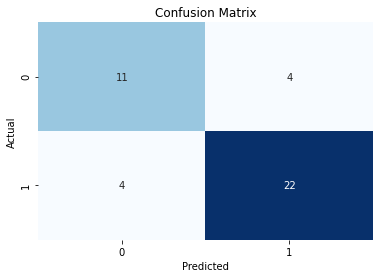

In [16]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(new_explained_variable, y_pred_without_synthetic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Block 6: Model testing

In [17]:
# Check for balanced test set
value_counts_ = y_test.value_counts()
num_zeros = value_counts_[0]
num_ones = value_counts_[1]
print("Test set:")
print("Quantity of y=0:", num_zeros)
print("Quantity of y=1:", num_ones)

Test set:
Quantity of y=0: 4
Quantity of y=1: 7


In [18]:
# Predict class labels for samples in X_test
y_pred_test = model.predict(X_test)

# Test accuracy
test_accuracy = model.score(X_test, y_test)
print("\nTest accuracy: ", test_accuracy)

# Confusion matrix on test data
print("\nConfusion matrix on test data:")
print(confusion_matrix(y_test, y_pred_test))

# Classification report on test data
print("\nClassification report on test data:")
print(classification_report(y_test, y_pred_test))


Test accuracy:  0.7272727272727273

Confusion matrix on test data:
[[3 1]
 [2 5]]

Classification report on test data:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.83      0.71      0.77         7

    accuracy                           0.73        11
   macro avg       0.72      0.73      0.72        11
weighted avg       0.75      0.73      0.73        11



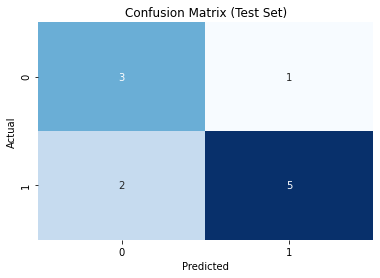

In [19]:
# Calculate and plot the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

## Block 7: Significance check

In [20]:
# Add a constant term to the independent variable matrix for the logistic regression
X_train_sm = sm.add_constant(X_train_sm)

# Train the logistic regression model using statsmodels (synthetic data included)
logit_model = sm.Logit(y_train_sm, X_train_sm)
result = logit_model.fit()

# Display logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450910
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           algo_profile   No. Observations:                   52
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                  0.3495
Time:                        16:11:52   Log-Likelihood:                -23.447
converged:                       True   LL-Null:                       -36.044
Covariance Type:            nonrobust   LLR p-value:                 5.188e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5559      0.769     -3.325      0.001      -4.062      -1.049
algorithmiz